# USA Housing Sales Prediction with Linear Regression Model

In this project, we will buid a linear regression line model to predict the USA Hosuing Sales.
In this dataset, there are 7 columns in total: **average area income, average house age, average number of rooms, average number of bedrooms, the area population, housing price and address**. Since address is not a quannative variable, it cannot be added into a variable in linear regression model.



In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Introduction of the Data


In [21]:
df=pd.read_csv("USA_Housing.csv")

In [22]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [24]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [25]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

## Statistical Plots of USA Housing Sales
### First, we used some statistical plots to explore the data

/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


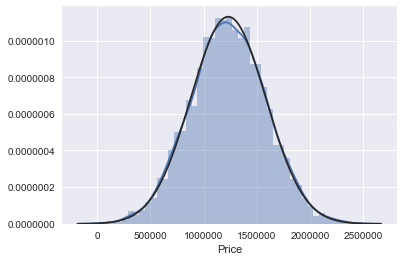

In [26]:
from scipy.stats import norm, skew
sns.distplot(df['Price'], fit=norm)

Thus, we can see that the distribution of the housing price is very similar to normal distribution.

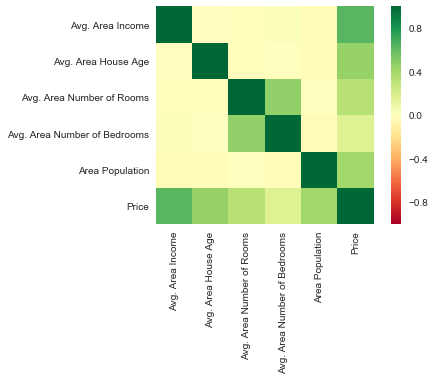

In [27]:
sns.heatmap(df.corr(),cmap="RdYlGn",square=True)

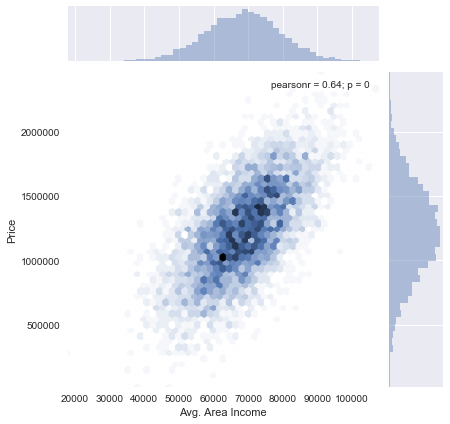

In [28]:
sns.jointplot(x='Avg. Area Income',y='Price',kind='hex',data=df)

Plot the box-plot of Housing Price

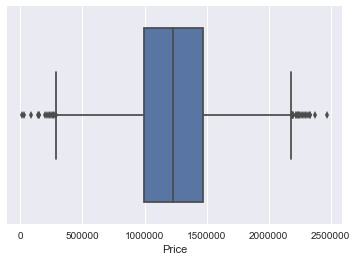

In [29]:
sns.boxplot(df['Price'])

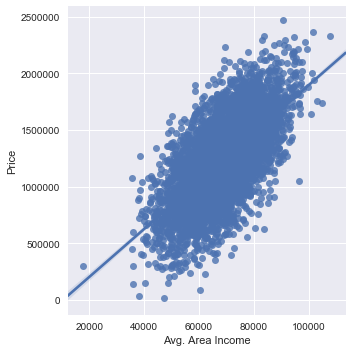

In [39]:
sns.lmplot(x='Avg. Area Income',y='Price',data=df)

## Spliting Data in to Training and Testing Data

In [30]:
y=df['Price']
X=df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

Improt sklearn package to split the data into training and testing data. 

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=100)

## Build Linear Regression Model
Use sklearn.linear_model to build a linear regression line of housing price with explanatory variable of average area income, average area house age, average area number of rooms, average area number of bedrooms and area population

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
lm = LinearRegression()

In [36]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Calculate the intercept of linear regression line

In [37]:
print(lm.intercept_)

-2630659.84652


Calculate the coeffients of linear regression line with five varibales

In [18]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [  2.17125764e+01   1.65696474e+05   1.19684516e+05   3.27710843e+02
   1.51018913e+01]


### Therefore, we can have the linear regression line of our model, which is 
$$y=0.217125764x_1+1.65696474*10^{-5}x_2+
1.19684516*10^{-5}x_3+3.27710843*10^{-2}x_4+0.151018913x_5-2630659.84652$$

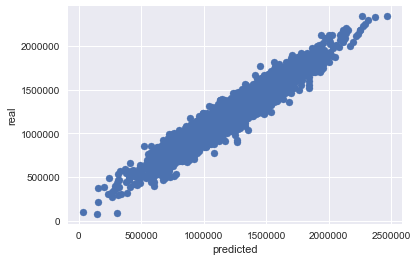

In [38]:
plt.scatter(y_test,lm.predict( X_test))
plt.xlabel('predicted')
plt.ylabel('real')

## Conclusion

By our linear regression model, all variables have a positive corelation with housing price. Average Area Income has the highes coefficent, which is 0.217125764. To interpret that, we say keep other variables fixed, increasing one unit Average Area Income will increase 0.217125764 unit of housing price.